In [2]:
# Import the pandas and pathlib libraries
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from MCForecastTools import MCSimulation
import datetime as dt
import alpaca_trade_api as tradeapi
import json

%matplotlib inline

In [3]:
# Read in the config file containing the Alpaca keys
#Source for reading in json file: http://zetcode.com/python/simplejson/

with open('Resources/config.json') as f:

    config = json.load(f)
    
    #print('Read file in: {}'.format(config['config'])) #verify that the dictionary is in there

config_data = {
    "key_values": [config['config']['alpaca_api_key'],config['config']['alpaca_secret_key']]
}
id = ["alpaca_api_key", "alpaca_secret_key"]


# Create the DataFrame
alpaca_dataframe = pd.DataFrame(config_data, id)
alpaca_api_key = alpaca_dataframe.loc['alpaca_api_key','key_values']
alpaca_secret_key = alpaca_dataframe.loc['alpaca_secret_key','key_values']

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

today = pd.Timestamp("2020-11-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["PG","WMT","INTC","INTU", "MSFT", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


df_portfolio

INTC                                  INTU  \
                            open   high    low close    volume    open   
time                                                                     
2020-11-09 00:00:00-05:00  46.63  47.35  45.54  45.6  37598108  365.95   

                                                            ...     SPY  \
                             high     low   close   volume  ...    open   
time                                                        ...           
2020-11-09 00:00:00-05:00  377.15  359.31  359.93  1434019  ...  363.97   

                                                              WMT            \
                             high     low   close     volume open      high   
time                                                                          
2020-11-09 00:00:00-05:00  364.38  354.06  354.54  140613847  148  148.1992   

                                                     
                              low   close    volume  
time                                                 
2020-11-09 00:00:00-05:00  143.48  143.57  16697872  

[1 rows x 30 columns]

In [4]:
start_date = pd.Timestamp('1990-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-09', tz='America/New_York').isoformat()

In [5]:
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

INTC                                   INTU  \
                            open   high    low  close     volume   open   
time                                                                      
2008-01-02 00:00:00-05:00  26.30  26.34  24.95  25.34   80661924  31.51   
2008-01-03 00:00:00-05:00  25.39  25.40  24.38  24.68   82108007  31.13   
2008-01-04 00:00:00-05:00  23.47  23.60  22.35  22.60  163865969  31.27   
2008-01-07 00:00:00-05:00  22.76  23.03  22.36  22.88  102883395  30.24   
2008-01-08 00:00:00-05:00  22.94  23.13  22.23  22.27   77456327  31.38   

                                                           ...     SPY  \
                            high    low  close     volume  ...    open   
time                                                       ...           
2008-01-02 00:00:00-05:00  31.94  30.96  31.13  3534903.0  ...  146.53   
2008-01-03 00:00:00-05:00  31.60  30.80  30.99  3131110.0  ...  144.92   
2008-01-04 00:00:00-05:00  31.27  30.00  30.11  2680338.0  ...  143.34   
2008-01-07 00:00:00-05:00  32.00  30.15  31.39  4184035.0  ...  141.81   
2008-01-08 00:00:00-05:00  31.50  30.50  30.50  3753966.0  ...  142.10   

                                                                WMT         \
                             high     low   close     volume   open   high   
time                                                                         
2008-01-02 00:00:00-05:00  146.99  143.88  144.55  175801806  47.41  47.63   
2008-01-03 00:00:00-05:00  145.49  144.12  144.46  111357758  46.72  46.86   
2008-01-04 00:00:00-05:00  143.44  140.92  140.93  195945264  45.91  46.37   
2008-01-07 00:00:00-05:00  142.23  140.10  141.46  220398905  45.80  46.81   
2008-01-08 00:00:00-05:00  142.90  138.63  138.81  303249870  46.59  47.08   

                                                   
                             low  close    volume  
time                                               
2008-01-02 00:00:00-05:00  46.46  46.90  18534649  
2008-01-03 00:00:00-05:00  46.23  46.39  16871690  
2008-01-04 00:00:00-05:00  45.37  45.64  19295369  
2008-01-07 00:00:00-05:00  45.59  46.58  17999462  
2008-01-08 00:00:00-05:00  45.88  45.91  17766798  

[5 rows x 30 columns]

In [6]:
# Configuring a Monte Carlo simulation to forecast three years daily returns

num_sims =50
MC_3yrs = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims, 
    weights = [.10,.10,.20,.20,.20,.20],
    num_trading_days = 252*3
)

In [7]:
MC_3yrs.portfolio_data.head()

INTC                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2008-01-02 00:00:00-05:00  26.30  26.34  24.95  25.34   80661924          NaN   
2008-01-03 00:00:00-05:00  25.39  25.40  24.38  24.68   82108007    -0.026046   
2008-01-04 00:00:00-05:00  23.47  23.60  22.35  22.60  163865969    -0.084279   
2008-01-07 00:00:00-05:00  22.76  23.03  22.36  22.88  102883395     0.012389   
2008-01-08 00:00:00-05:00  22.94  23.13  22.23  22.27   77456327    -0.026661   

                            INTU                       ...     SPY          \
                            open   high    low  close  ...     low   close   
time                                                   ...                   
2008-01-02 00:00:00-05:00  31.51  31.94  30.96  31.13  ...  143.88  144.55   
2008-01-03 00:00:00-05:00  31.13  31.60  30.80  30.99  ...  144.12  144.46   
2008-01-04 00:00:00-05:00  31.27  31.27  30.00  30.11  ...  140.92  140.93   
2008-01-07 00:00:00-05:00  30.24  32.00  30.15  31.39  ...  140.10  141.46   
2008-01-08 00:00:00-05:00  31.38  31.50  30.50  30.50  ...  138.63  138.81   

                                                     WMT                       \
                              volume daily_return   open   high    low  close   
time                                                                            
2008-01-02 00:00:00-05:00  175801806          NaN  47.41  47.63  46.46  46.90   
2008-01-03 00:00:00-05:00  111357758    -0.000623  46.72  46.86  46.23  46.39   
2008-01-04 00:00:00-05:00  195945264    -0.024436  45.91  46.37  45.37  45.64   
2008-01-07 00:00:00-05:00  220398905     0.003761  45.80  46.81  45.59  46.58   
2008-01-08 00:00:00-05:00  303249870    -0.018733  46.59  47.08  45.88  45.91   

                                                  
                             volume daily_return  
time                                              
2008-01-02 00:00:00-05:00  18534649          NaN  
2008-01-03 00:00:00-05:00  16871690    -0.010874  
2008-01-04 00:00:00-05:00  19295369    -0.016167  
2008-01-07 00:00:00-05:00  17999462     0.020596  
2008-01-08 00:00:00-05:00  17766798    -0.014384  

[5 rows x 36 columns]

In [8]:
MC_3yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003688,0.997211,1.003776,0.984474,0.998255,1.002217,1.010134,1.007521,1.009640,0.998942,...,1.006205,1.004274,1.000386,1.001313,1.004174,1.000419,1.005600,1.005865,1.004662,0.994394
2,1.006724,0.997289,1.009612,0.992799,1.004280,1.003686,1.015434,1.007837,1.007185,1.000590,...,1.005546,0.997228,1.006986,0.996710,1.004177,1.000842,1.005104,1.003829,1.000323,1.008396
3,1.007104,1.011274,1.012220,1.011073,0.999923,1.000606,1.022447,1.009141,1.017234,1.007737,...,1.010445,0.993901,0.988390,1.006989,1.006887,0.987440,0.996078,0.997324,1.003939,1.013865
4,1.008093,1.002778,1.006826,1.024194,1.008453,1.006174,1.012035,1.006594,1.017489,1.000299,...,1.015042,1.000319,0.995924,0.988093,1.002820,0.984842,0.996997,0.993604,1.005883,1.020417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.287252,1.625274,1.260771,1.734067,1.442665,1.620824,1.418391,1.488319,1.528021,1.260000,...,1.227226,1.347273,1.296842,1.713138,1.633250,1.218951,1.301276,1.157667,1.673475,1.711491
753,1.281851,1.617008,1.254929,1.741902,1.444492,1.618381,1.423481,1.509112,1.537281,1.264603,...,1.231263,1.347040,1.288250,1.726132,1.632687,1.230321,1.299248,1.154616,1.674346,1.716895
754,1.280077,1.606912,1.252314,1.716831,1.438940,1.625246,1.417692,1.519436,1.528554,1.261308,...,1.243269,1.344758,1.288678,1.730466,1.636919,1.228138,1.307644,1.160973,1.674207,1.703174
755,1.287897,1.611085,1.254718,1.729233,1.435663,1.636056,1.424930,1.519733,1.535996,1.262979,...,1.226960,1.357141,1.284260,1.757574,1.639866,1.232528,1.310972,1.163212,1.665778,1.703390


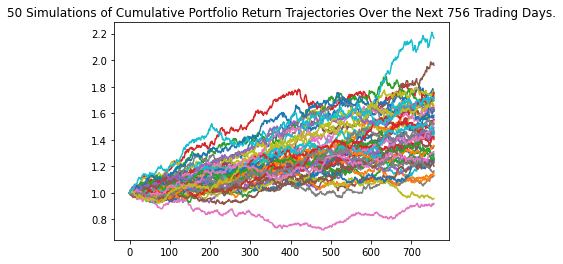

In [9]:
line_plot = MC_3yrs.plot_simulation()
line_plot.get_figure().savefig("MC_3yrs_sim_plot.png", bbox_inches="tight")

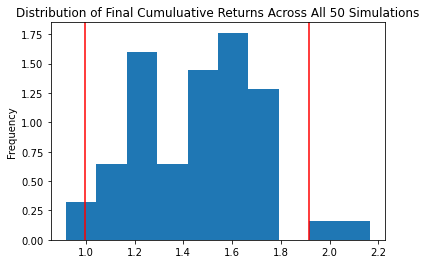

In [10]:
dist_plot = MC_3yrs.plot_distribution()

In [11]:
sum_tbl = MC_3yrs.summarize_cumulative_return()
sum_tbl

count           50.000000
mean             1.464211
std              0.249429
min              0.917851
25%              1.255941
50%              1.475977
75%              1.635833
max              2.166338
95% CI Lower     0.995340
95% CI Upper     1.914855
Name: 756, dtype: float64

In [12]:
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(initial_investment*sum_tbl["95% CI Lower"],2)
ci_upper = round(initial_investment*sum_tbl["95% CI Upper"],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19906.79 and $38297.1


In [13]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns:
MC_5yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.10,.20,.20,.20,.20],
    num_simulation = 50,
    num_trading_days = 252*5
)
MC_5yrs.portfolio_data.head()

INTC                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2008-01-02 00:00:00-05:00  26.30  26.34  24.95  25.34   80661924          NaN   
2008-01-03 00:00:00-05:00  25.39  25.40  24.38  24.68   82108007    -0.026046   
2008-01-04 00:00:00-05:00  23.47  23.60  22.35  22.60  163865969    -0.084279   
2008-01-07 00:00:00-05:00  22.76  23.03  22.36  22.88  102883395     0.012389   
2008-01-08 00:00:00-05:00  22.94  23.13  22.23  22.27   77456327    -0.026661   

                            INTU                       ...     SPY          \
                            open   high    low  close  ...     low   close   
time                                                   ...                   
2008-01-02 00:00:00-05:00  31.51  31.94  30.96  31.13  ...  143.88  144.55   
2008-01-03 00:00:00-05:00  31.13  31.60  30.80  30.99  ...  144.12  144.46   
2008-01-04 00:00:00-05:00  31.27  31.27  30.00  30.11  ...  140.92  140.93   
2008-01-07 00:00:00-05:00  30.24  32.00  30.15  31.39  ...  140.10  141.46   
2008-01-08 00:00:00-05:00  31.38  31.50  30.50  30.50  ...  138.63  138.81   

                                                     WMT                       \
                              volume daily_return   open   high    low  close   
time                                                                            
2008-01-02 00:00:00-05:00  175801806          NaN  47.41  47.63  46.46  46.90   
2008-01-03 00:00:00-05:00  111357758    -0.000623  46.72  46.86  46.23  46.39   
2008-01-04 00:00:00-05:00  195945264    -0.024436  45.91  46.37  45.37  45.64   
2008-01-07 00:00:00-05:00  220398905     0.003761  45.80  46.81  45.59  46.58   
2008-01-08 00:00:00-05:00  303249870    -0.018733  46.59  47.08  45.88  45.91   

                                                  
                             volume daily_return  
time                                              
2008-01-02 00:00:00-05:00  18534649          NaN  
2008-01-03 00:00:00-05:00  16871690    -0.010874  
2008-01-04 00:00:00-05:00  19295369    -0.016167  
2008-01-07 00:00:00-05:00  17999462     0.020596  
2008-01-08 00:00:00-05:00  17766798    -0.014384  

[5 rows x 36 columns]

In [14]:
MC_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007781,1.003699,1.006209,0.985692,0.998908,0.997715,1.000560,0.995649,0.978361,0.994868,...,0.998316,1.002346,0.997113,0.997433,1.012155,1.004117,0.995235,0.993947,1.003340,1.006345
2,1.004306,0.994238,1.001530,0.981673,1.007195,1.010204,1.006418,0.987551,0.978447,0.999239,...,0.996153,1.003897,0.992766,1.002959,1.012970,0.995785,0.993831,0.986560,1.006248,0.997040
3,1.004059,1.001430,0.995971,0.977978,1.008857,1.012859,0.999269,0.986434,0.979637,0.990268,...,1.009215,1.004883,0.992880,1.009235,1.006338,0.996644,0.993190,0.992055,1.016235,1.001784
4,1.012400,1.013241,1.001034,0.973409,1.022963,1.011788,1.004823,0.984031,0.976358,0.979407,...,1.011360,1.005784,0.992551,1.019179,1.014718,0.995036,0.992133,0.993381,1.024764,0.994683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.489029,1.611212,1.397802,2.306643,1.819246,1.360732,2.001458,2.109201,1.851175,2.146096,...,1.981319,1.820561,2.136015,1.199553,1.445785,2.177035,1.829767,1.039785,2.352500,1.838674
1257,1.499648,1.613206,1.390971,2.308070,1.828649,1.364352,2.015203,2.108650,1.843779,2.144511,...,1.989655,1.829918,2.135999,1.182042,1.436877,2.177795,1.829477,1.038124,2.347442,1.850993
1258,1.518443,1.602896,1.402858,2.331167,1.840608,1.354257,2.005793,2.118725,1.847087,2.158098,...,1.979672,1.813956,2.154839,1.190527,1.435871,2.177720,1.844226,1.036676,2.361236,1.844981
1259,1.523403,1.612601,1.416070,2.313178,1.841607,1.358598,2.014335,2.109216,1.859799,2.153716,...,1.967068,1.803184,2.148951,1.195031,1.429600,2.165093,1.855352,1.044588,2.357001,1.835142


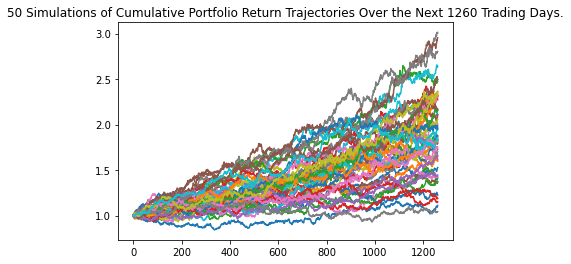

In [15]:
#Plotting the Probability distribution:

line_plot = MC_5yrs.plot_simulation()
line_plot.get_figure().savefig("MC_5yrs_sim_plot.png", bbox_inches="tight")

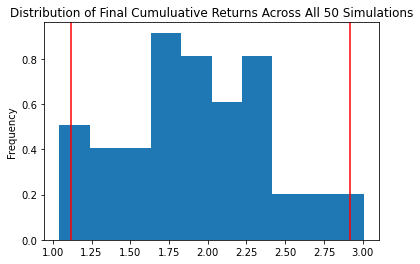

In [16]:
# Plot probability distribution and confidence intervals

dist_plot = MC_5yrs.plot_distribution()

In [17]:
#Fetching the summary satistics table for 5YRS cummulative returns:
sum_tbl_5yrs = MC_5yrs.summarize_cumulative_return()
sum_tbl_5yrs

count           50.000000
mean             1.923234
std              0.469320
min              1.042617
25%              1.622559
50%              1.854190
75%              2.292822
max              3.007156
95% CI Lower     1.119619
95% CI Upper     2.919531
Name: 1260, dtype: float64

In [18]:
initial_investment_5yrs= 20000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_5yrs = round(initial_investment_5yrs*sum_tbl_5yrs["95% CI Lower"],2)
ci_upper_5yrs = round(initial_investment_5yrs*sum_tbl_5yrs["95% CI Upper"],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yrs} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs} and ${ci_upper_5yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $22392.37 and $58390.63


In [19]:
initial_investment_5yrs= 20000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_5yrs = round(initial_investment_5yrs*sum_tbl_5yrs["95% CI Lower"],2)
ci_upper_5yrs = round(initial_investment_5yrs*sum_tbl_5yrs["95% CI Upper"],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yrs} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs} and ${ci_upper_5yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $22392.37 and $58390.63


In [20]:
# Configure a Monte Carlo simulation to forecast 10 years daily returns with the changes in weights:

MC_10yrs = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 50, 
    weights = [.10,.10,.30,.20,.10,.20,],
    num_trading_days = 252*10
)
MC_10yrs.portfolio_data.head().dropna()

INTC                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2008-01-03 00:00:00-05:00  25.39  25.40  24.38  24.68   82108007    -0.026046   
2008-01-04 00:00:00-05:00  23.47  23.60  22.35  22.60  163865969    -0.084279   
2008-01-07 00:00:00-05:00  22.76  23.03  22.36  22.88  102883395     0.012389   
2008-01-08 00:00:00-05:00  22.94  23.13  22.23  22.27   77456327    -0.026661   

                            INTU                       ...     SPY          \
                            open   high    low  close  ...     low   close   
time                                                   ...                   
2008-01-03 00:00:00-05:00  31.13  31.60  30.80  30.99  ...  144.12  144.46   
2008-01-04 00:00:00-05:00  31.27  31.27  30.00  30.11  ...  140.92  140.93   
2008-01-07 00:00:00-05:00  30.24  32.00  30.15  31.39  ...  140.10  141.46   
2008-01-08 00:00:00-05:00  31.38  31.50  30.50  30.50  ...  138.63  138.81   

                                                     WMT                       \
                              volume daily_return   open   high    low  close   
time                                                                            
2008-01-03 00:00:00-05:00  111357758    -0.000623  46.72  46.86  46.23  46.39   
2008-01-04 00:00:00-05:00  195945264    -0.024436  45.91  46.37  45.37  45.64   
2008-01-07 00:00:00-05:00  220398905     0.003761  45.80  46.81  45.59  46.58   
2008-01-08 00:00:00-05:00  303249870    -0.018733  46.59  47.08  45.88  45.91   

                                                  
                             volume daily_return  
time                                              
2008-01-03 00:00:00-05:00  16871690    -0.010874  
2008-01-04 00:00:00-05:00  19295369    -0.016167  
2008-01-07 00:00:00-05:00  17999462     0.020596  
2008-01-08 00:00:00-05:00  17766798    -0.014384  

[4 rows x 36 columns]

In [21]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns:
MC_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002122,1.001989,0.991208,1.014227,1.003838,1.007316,0.997205,0.995062,1.006666,1.000571,...,0.995219,1.012310,1.000478,0.986336,1.011426,0.997051,0.995718,0.995172,1.007357,0.999451
2,1.006727,1.006805,0.993529,1.018419,1.001003,0.995348,1.003389,0.997598,1.004484,0.996624,...,1.007012,1.011947,1.012846,0.987351,0.996070,1.002102,1.000085,0.999039,1.000508,1.007082
3,1.004051,1.014297,0.992383,1.021975,0.995485,0.994949,1.001431,1.000621,1.009304,0.990394,...,1.018913,1.011899,1.015496,0.990756,1.006519,0.999970,0.993701,1.009564,1.002799,1.012656
4,1.009698,1.013498,0.990864,1.024551,0.999507,0.986469,1.014684,0.998830,1.007249,0.997475,...,1.025495,1.023234,0.999643,0.992590,1.011163,0.987911,0.999218,0.998188,0.997197,1.012331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.696477,2.033021,3.945351,4.884980,3.105686,3.300143,4.964608,5.400401,2.830895,2.013687,...,3.597681,6.002703,3.275882,3.409881,2.167124,5.661333,3.669130,3.016049,2.152729,3.567158
2517,2.713711,2.029489,3.957196,4.802420,3.106111,3.334227,4.963833,5.421004,2.829173,2.008332,...,3.602575,5.985711,3.298713,3.415073,2.191496,5.611362,3.698905,2.984586,2.173216,3.549481
2518,2.737920,2.053715,3.955002,4.817716,3.148662,3.287991,4.980117,5.457204,2.866599,2.036238,...,3.588027,5.959902,3.311075,3.382019,2.193995,5.637428,3.716238,2.957945,2.191221,3.528867
2519,2.759383,2.077685,3.971179,4.796013,3.137012,3.305270,5.046769,5.438584,2.872727,2.022164,...,3.536786,5.981054,3.305363,3.360307,2.189457,5.636440,3.749729,2.967203,2.180213,3.488063


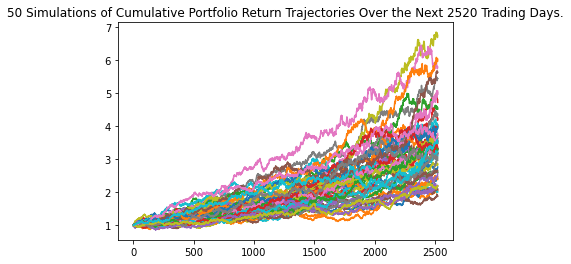

In [22]:
#plotting the simulation outcomes:'''

line_plot_10yrs = MC_10yrs.plot_simulation()
line_plot.get_figure().savefig("MC_10yrs_sim_plot.png", bbox_inches="tight")

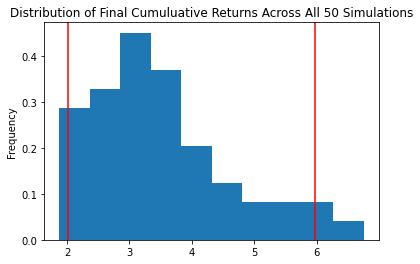

In [23]:
#Plotting the probality distribution and confidence intervals:
dist_plot_10yrs = MC_10yrs.plot_distribution()

In [24]:
#Fetching the summary statistics of cumulative outcomes for 10 yrs:

sum_tbl_10yrs = MC_10yrs.summarize_cumulative_return()
sum_tbl_10yrs

count           50.000000
mean             3.522409
std              1.127095
min              1.877822
25%              2.680756
50%              3.324432
75%              3.993020
max              6.755888
95% CI Lower     2.018550
95% CI Upper     5.974729
Name: 2520, dtype: float64

In [25]:
#Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 over 10yrs :

initial_investment_10yrs= 20000

ci_lower_10yrs = round(initial_investment_10yrs*sum_tbl_10yrs["95% CI Lower"],2)
ci_upper_10yrs = round(initial_investment_10yrs*sum_tbl_10yrs["95% CI Upper"],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yrs} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10yrs} and ${ci_upper_10yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $40371.01 and $119494.58


In [26]:
import numpy as np
import pandas as pd

def calc_diff(frame, duration):
    #assume that frame is valid will have the number of entries required for duration
    #assume that frame is sorted
    
    tmp=(frame.iloc[0][0]-frame.iloc[duration-1][0])/frame.iloc[duration-1][0]
    tmp=tmp*100
    return tmp

link_frame = pd.read_csv("Resources/link_history_total.csv",infer_datetime_format=True,parse_dates=True)
ada_frame = pd.read_csv("Resources/ada_history_total.csv",infer_datetime_format=True,parse_dates=True)
vet_frame = pd.read_csv("Resources/vet_history_total.csv",infer_datetime_format=True,parse_dates=True)
bat_frame = pd.read_csv("Resources/bat_history_total.csv",infer_datetime_format=True,parse_dates=True)
band_frame = pd.read_csv("Resources/band_history_total.csv",infer_datetime_format=True,parse_dates=True)
ren_frame = pd.read_csv("Resources/ren_history_total.csv",infer_datetime_format=True,parse_dates=True)
snx_frame = pd.read_csv("Resources/snx_history_total.csv",infer_datetime_format=True,parse_dates=True)
cel_frame = pd.read_csv("Resources/cel_history_total.csv",infer_datetime_format=True,parse_dates=True)

link_frame['Date']=pd.to_datetime(link_frame['Date'],format="%Y-%m-%d")
ada_frame['Date']=pd.to_datetime(ada_frame['Date'],format="%Y-%m-%d")
vet_frame['Date']=pd.to_datetime(vet_frame['Date'],format="%Y-%m-%d")
bat_frame['Date']=pd.to_datetime(bat_frame['Date'],format="%Y-%m-%d")
band_frame['Date']=pd.to_datetime(band_frame['Date'],format="%Y-%m-%d")
ren_frame['Date']=pd.to_datetime(ren_frame['Date'],format="%Y-%m-%d")
snx_frame['Date']=pd.to_datetime(snx_frame['Date'],format="%Y-%m-%d")
cel_frame['Date']=pd.to_datetime(cel_frame['Date'],format="%Y-%m-%d")

link_frame=link_frame.drop(link_frame.columns[0],axis=1)
ada_frame=ada_frame.drop(ada_frame.columns[0],axis=1)
vet_frame=vet_frame.drop(vet_frame.columns[0],axis=1)
bat_frame=bat_frame.drop(bat_frame.columns[0],axis=1)
band_frame=band_frame.drop(band_frame.columns[0],axis=1)
ren_frame=ren_frame.drop(ren_frame.columns[0],axis=1)
snx_frame=snx_frame.drop(snx_frame.columns[0],axis=1)
cel_frame=cel_frame.drop(cel_frame.columns[0],axis=1)

link_close=link_frame[['Date','Close']]
ada_close=ada_frame[['Date','Close']]
vet_close=vet_frame[['Date','Close']]
bat_close=bat_frame[['Date','Close']]
band_close=band_frame[['Date','Close']]
ren_close=ren_frame[['Date','Close']]
snx_close=snx_frame[['Date','Close']]
cel_close=cel_frame[['Date','Close']]

link_close=link_close.rename(columns={'Close':'LINK'})
ada_close=ada_close.rename(columns={'Close':'ADA'})
vet_close=vet_close.rename(columns={'Close':'VET'})
bat_close=bat_close.rename(columns={'Close':'BAT'})
band_close=band_close.rename(columns={'Close':'BAND'})
ren_close=ren_close.rename(columns={'Close':'REN'})
snx_close=snx_close.rename(columns={'Close':'SNX'})
cel_close=cel_close.rename(columns={'Close':'CEL'})

link_close=link_close.set_index('Date')
ada_close=ada_close.set_index('Date')
vet_close=vet_close.set_index('Date')
bat_close=bat_close.set_index('Date')
band_close=band_close.set_index('Date')
ren_close=ren_close.set_index('Date')
snx_close=snx_close.set_index('Date')
cel_close=cel_close.set_index('Date')

link_daily_ret=link_close.pct_change()
ada_daily_ret=ada_close.pct_change()
vet_daily_ret=vet_close.pct_change()
bat_daily_ret=bat_close.pct_change()
band_daily_ret=band_close.pct_change()
ren_daily_ret=ren_close.pct_change()
snx_daily_ret=snx_close.pct_change()
cel_daily_ret=cel_close.pct_change()

print(link_daily_ret)
print(ada_daily_ret)
print(vet_daily_ret)
print(bat_daily_ret)
print(band_daily_ret)
print(ren_daily_ret)
print(snx_daily_ret)
print(cel_daily_ret)

                LINK
Date                
2017-09-20       NaN
2017-09-21 -0.086277
2017-09-22 -0.153992
2017-09-23  0.270412
2017-09-24  0.051887
...              ...
2020-11-09  0.039936
2020-11-10 -0.018433
2020-11-11 -0.028169
2020-11-12  0.037842
2020-11-13 -0.029480

[1151 rows x 1 columns]
                 ADA
Date                
2017-09-30       NaN
2017-10-01  0.027392
2017-10-02 -0.194745
2017-10-03  0.050384
2017-10-04 -0.016903
...              ...
2020-11-09  0.004744
2020-11-10  0.001889
2020-11-11 -0.012253
2020-11-12  0.017176
2020-11-13 -0.039400

[1141 rows x 1 columns]
                 VET
Date                
2017-09-13       NaN
2017-09-14  0.242865
2017-09-15  0.074588
2017-09-16 -0.055070
2017-09-17  0.020489
...              ...
2020-11-09  0.054545
2020-11-10 -0.017241
2020-11-11 -0.061404
2020-11-12  0.102804
2020-11-13 -0.059322

[1158 rows x 1 columns]
                 BAT
Date                
2017-05-30       NaN
2017-05-31 -0.126976
2017-06-01 -0.068799
2

In [27]:
link_std_dev=link_daily_ret.std()
ada_std_dev=ada_daily_ret.std()
vet_std_dev=vet_daily_ret.std()
bat_std_dev=bat_daily_ret.std()
band_std_dev=band_daily_ret.std()
ren_std_dev=ren_daily_ret.std()
snx_std_dev=snx_daily_ret.std()
cel_std_dev=cel_daily_ret.std()

print(link_std_dev)
print(ada_std_dev)
print(vet_std_dev)
print(bat_std_dev)
print(band_std_dev)
print(ren_std_dev)
print(snx_std_dev)
print(cel_std_dev)

LINK    0.081344
dtype: float64
ADA    0.086161
dtype: float64
VET    9.312262
dtype: float64
BAT    0.074246
dtype: float64
BAND    0.101348
dtype: float64
REN   NaN
dtype: float64
SNX    0.092679
dtype: float64
CEL   NaN
dtype: float64


In [28]:
annual_std_dev=pd.DataFrame([['LINK',link_std_dev.iloc[0]*np.sqrt(252)],
                              ['ADA',ada_std_dev.iloc[0]*np.sqrt(252)],
                              ['BAND',band_std_dev.iloc[0]*np.sqrt(252)],
                              ['REN',ren_std_dev.iloc[0]*np.sqrt(252)],
                              ['SNX',snx_std_dev.iloc[0]*np.sqrt(252)],
                              ['CEL',cel_std_dev.iloc[0]*np.sqrt(252)]],
                           columns=['COIN','STD_DEV']).dropna()
print(annual_std_dev)

   COIN   STD_DEV
0  LINK  1.291290
1   ADA  1.367766
2  BAND  1.608855
4   SNX  1.471238


In [29]:
all_returns=pd.concat([link_close,ada_close,band_close,snx_close],axis=1).dropna()

print(all_returns)

              LINK      ADA    BAND     SNX
Date                                       
2019-09-18   1.880  0.05249  0.6045  0.4957
2019-09-19   1.823  0.05254  0.6793  0.4900
2019-09-20   1.880  0.05202  0.8102  0.4791
2019-09-21   1.819  0.04909  0.7222  0.4920
2019-09-22   1.802  0.04623  0.6346  0.4435
...            ...      ...     ...     ...
2020-11-09  13.020  0.10590  6.2830  4.6810
2020-11-10  12.780  0.10610  5.9320  3.9970
2020-11-11  12.420  0.10480  5.5450  3.7750
2020-11-12  12.890  0.10660  5.9270  4.2070
2020-11-13  12.510  0.10240  5.5640  4.0120

[423 rows x 4 columns]


In [30]:
total_std_dev=all_returns.std()
print(total_std_dev)

LINK    4.153518
ADA     0.034434
BAND    3.623353
SNX     1.736381
dtype: float64


In [31]:
sharpe_ratios=(all_returns.mean()*252)/(total_std_dev*np.sqrt(252))
print(sharpe_ratios)

LINK    21.206074
ADA     31.441967
BAND    11.350205
SNX     18.304450
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios of Popular Alt-Coins (2020)'}>

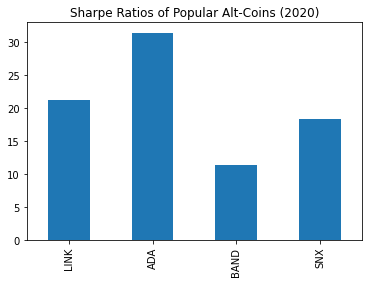

In [32]:
sharpe_ratios.plot.bar(title='Sharpe Ratios of Popular Alt-Coins (2020)')

LINK: 30 day +/-  18.13%
LINK: 7 day +/-  -1.65%
LINK: 24 hr +/-  -2.95%


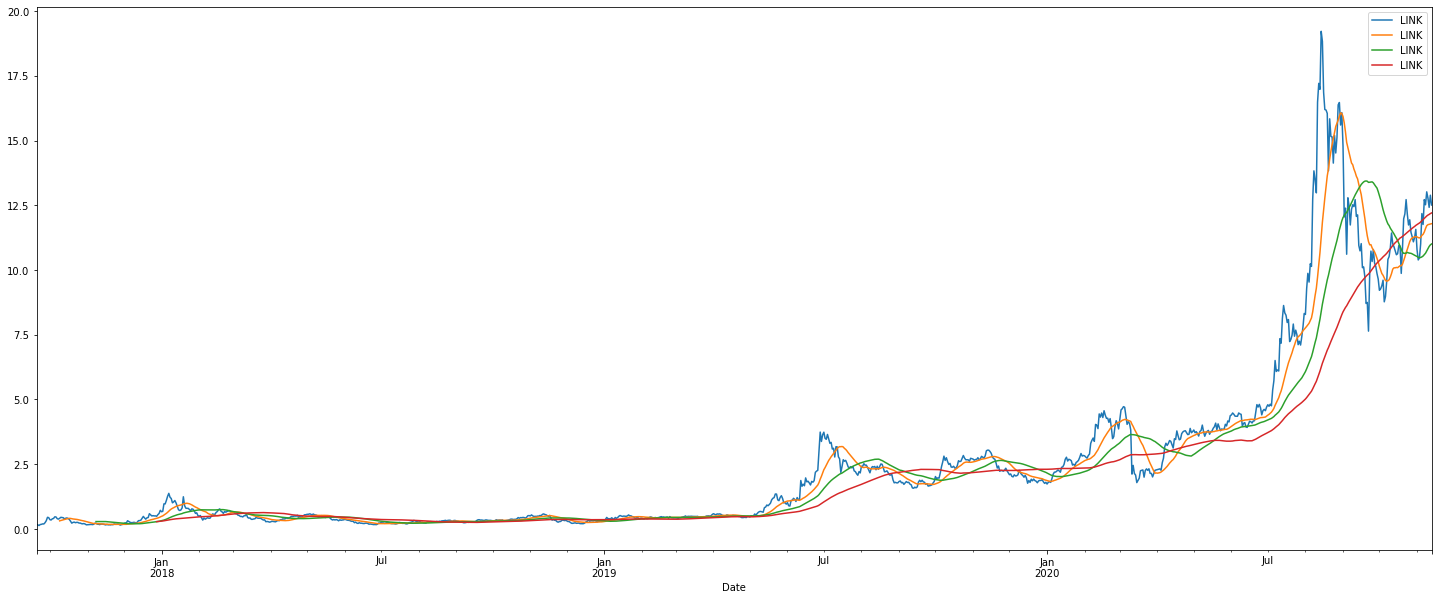

In [33]:
ax=link_close.plot(figsize=(25,10))

link_sma_20=link_close.rolling(window=20).mean()
link_sma_50=link_close.rolling(window=50).mean()
link_sma_100=link_close.rolling(window=100).mean()

link_sma_20.plot(ax=ax)
link_sma_50.plot(ax=ax)
link_sma_100.plot(ax=ax)

link_close=link_close.sort_values(by='Date',ascending=False)
link_30_diff=calc_diff(link_close,30)
link_7_diff=calc_diff(link_close,7)
link_1_diff=calc_diff(link_close,2)

print("LINK: 30 day +/-  "+str(round(link_30_diff,2))+"%")
print("LINK: 7 day +/-  "+str(round(link_7_diff,2))+"%")
print("LINK: 24 hr +/-  "+str(round(link_1_diff,2))+"%")

ADA: 30 day +/-  -1.82%
ADA: 7 day +/-  -4.12%
ADA: 24 hr +/-  -3.94%


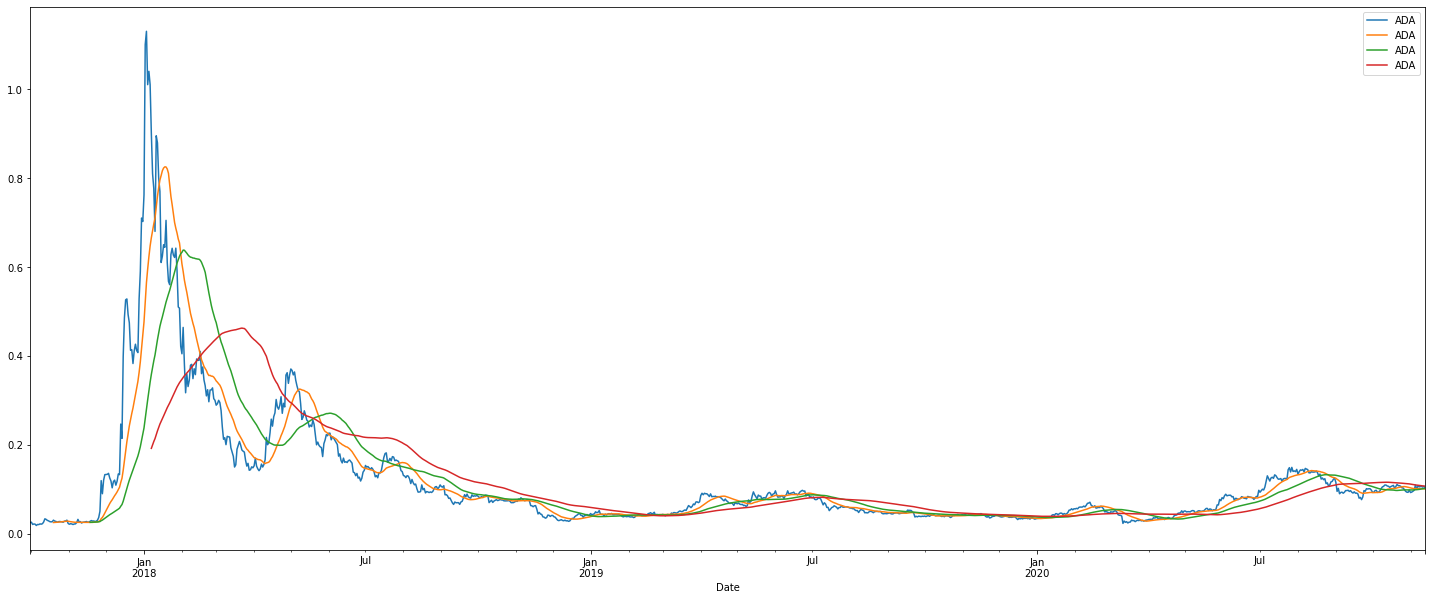

In [34]:
ax=ada_close.plot(figsize=(25,10))

ada_sma_20=ada_close.rolling(window=20).mean()
ada_sma_50=ada_close.rolling(window=50).mean()
ada_sma_100=ada_close.rolling(window=100).mean()

ada_sma_20.plot(ax=ax)
ada_sma_50.plot(ax=ax)
ada_sma_100.plot(ax=ax)

ada_close=ada_close.sort_values(by='Date',ascending=False)
ada_30_diff=calc_diff(ada_close,30)
ada_7_diff=calc_diff(ada_close,7)
ada_1_diff=calc_diff(ada_close,2)

print("ADA: 30 day +/-  "+str(round(ada_30_diff,2))+"%")
print("ADA: 7 day +/-  "+str(round(ada_7_diff,2))+"%")
print("ADA: 24 hr +/-  "+str(round(ada_1_diff,2))+"%")

BAND: 30 day +/-  -7.57%
BAND: 7 day +/-  -1.71%
BAND: 24 hr +/-  -6.12%


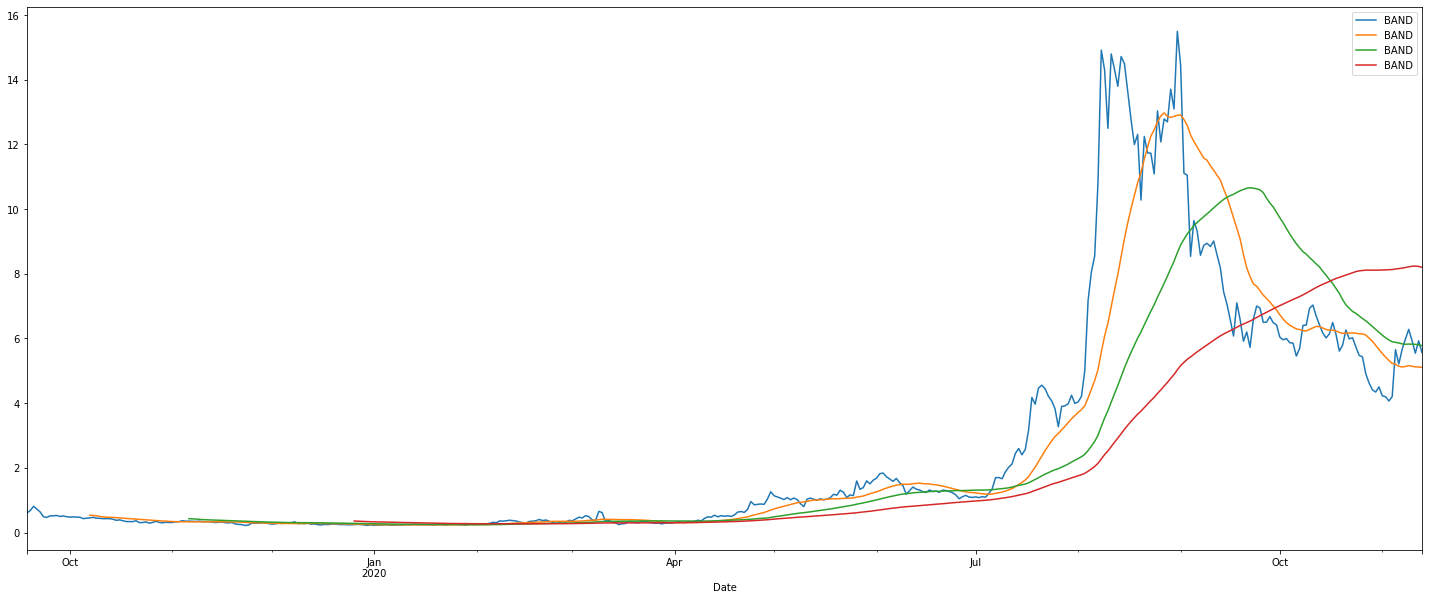

In [35]:
ax=band_close.plot(figsize=(25,10))

band_sma_20=band_close.rolling(window=20).mean()
band_sma_50=band_close.rolling(window=50).mean()
band_sma_100=band_close.rolling(window=100).mean()

band_sma_20.plot(ax=ax)
band_sma_50.plot(ax=ax)
band_sma_100.plot(ax=ax)

band_close=band_close.sort_values(by='Date',ascending=False)
band_30_diff=calc_diff(band_close,30)
band_7_diff=calc_diff(band_close,7)
band_1_diff=calc_diff(band_close,2)

print("BAND: 30 day +/-  "+str(round(band_30_diff,2))+"%")
print("BAND: 7 day +/-  "+str(round(band_7_diff,2))+"%")
print("BAND: 24 hr +/-  "+str(round(band_1_diff,2))+"%")

SNX: 30 day +/-  2.85%
SNX: 7 day +/-  -8.96%
SNX: 24 hr +/-  -4.64%


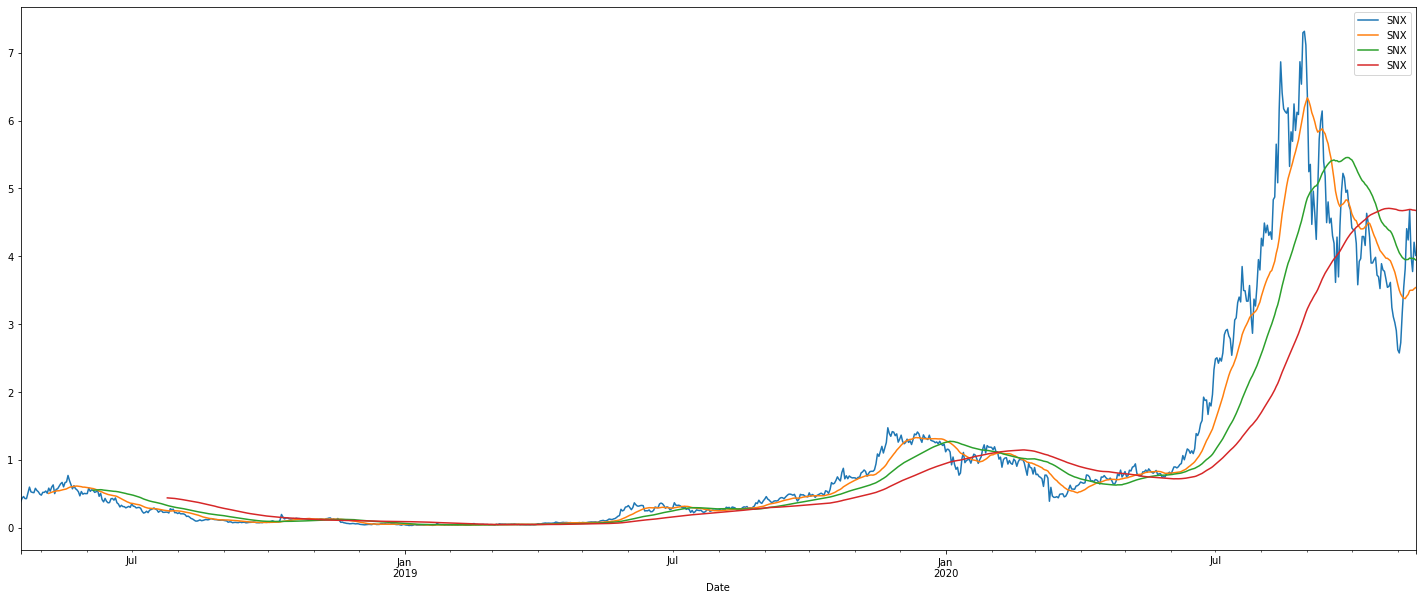

In [36]:
ax=snx_close.plot(figsize=(25,10))

snx_sma_20=snx_close.rolling(window=20).mean()
snx_sma_50=snx_close.rolling(window=50).mean()
snx_sma_100=snx_close.rolling(window=100).mean()

snx_sma_20.plot(ax=ax)
snx_sma_50.plot(ax=ax)
snx_sma_100.plot(ax=ax)

snx_close=snx_close.sort_values(by='Date',ascending=False)
snx_30_diff=calc_diff(snx_close,30)
snx_7_diff=calc_diff(snx_close,7)
snx_1_diff=calc_diff(snx_close,2)

print("SNX: 30 day +/-  "+str(round(snx_30_diff,2))+"%")
print("SNX: 7 day +/-  "+str(round(snx_7_diff,2))+"%")
print("SNX: 24 hr +/-  "+str(round(snx_1_diff,2))+"%")